# Alphabet Soup Challenge

In [189]:
# Import our dependencies
import pandas as pd
import tensorflow as tf
import os
import warnings
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

#Supress distracting deprication warnings
warnings.filterwarnings(action='once')

### Import and characterize the input data
Identify the following in your dataset:

- What variable(s) are considered the target for your model?
- What variable(s) are considered to be the features for your model?
- What variable(s) are neither and should be removed from the input data?

In [190]:
# Define the data path and source file
data = os.path.join("Resources", "charity_data.csv")
# Import the dataset into a dataframe
rawdata_df = pd.read_csv(data)
rawdata_df#.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


### Dataset description provided as part of the Challenge resources
    
The dataset contains more than 34,000 organizations that have received various amounts of funding from Alphabet Soup over the years. 

Within this dataset are a number of columns that capture metadata about each organization such as the following:

- EIN and NAME—Identification columns
- APPLICATION_TYPE—Alphabet Soup application type
- AFFILIATION—Affiliated sector of industry
- CLASSIFICATION—Government organization classification
- USE_CASE—Use case for funding
- ORGANIZATION—Organization type
- STATUS—Active status
- INCOME_AMT—Income classification
- SPECIAL_CONSIDERATIONS—Special consideration for application
- ASK_AMT—Funding amount requested
- IS_SUCCESSFUL—Was the money used effectively

In [191]:
# Check the shape of the data
rawdata_df.shape

# There are 34k+ rows with 12 columns.

(34299, 12)

In [192]:
# Check the types of the datasets' columns
rawdata_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [193]:
rawdata_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [194]:
rawdata_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

Analysis

- EIN - Employeer Identifier Number is a unique identifier per org, discrete
- STATUS - values 0 or 1
- ASK_AMT - continuous
- IS_SUCCESSFUL - values 0 or 1

Using the provided column descriptions and the above initial analysis we can answer the questions.

What variable(s) are considered the target for your model?
- IS_SUCCESSFUL

What variable(s) are considered to be the features for your model?
- ASK_AMT
- AFFILIATION
- CLASSIFICATION
- USE_CASE
- ORGANIZATION
- INCOME_AMT - NOTE look like bucket categories

What variable(s) are neither and should be removed from the input data?
- EIN and NAME 
- STATUS
- SPECIAL_CONSIDERATIONS
- APPLICATION_TYPE

NOTE: Consider the immediate above data types as non-features because they appear to be administrative codes applied to rather than discenrable attributes of the organizations. We can revisit this assumption depending on the results of the analysys. 


In [195]:
# Keep org rows where STATUS == 1 and drop the rest, STATUS == 0 indicating NOT Active
cleandata_df = rawdata_df.loc[rawdata_df["STATUS"] == 1]

# Drop columns that are neither features nor targets from the dataset
cleandata_df = cleandata_df.drop(columns=["EIN", "NAME", "SPECIAL_CONSIDERATIONS", "APPLICATION_TYPE", "STATUS"])

cleandata_df.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,Independent,C1000,ProductDev,Association,0,5000,1
1,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [196]:
# Check the shape and types of the dataframe
print(cleandata_df.shape)
cleandata_df.dtypes

# Dropped five rows

(34294, 7)


AFFILIATION       object
CLASSIFICATION    object
USE_CASE          object
ORGANIZATION      object
INCOME_AMT        object
ASK_AMT            int64
IS_SUCCESSFUL      int64
dtype: object

### Preprocess the data 
Using the methods described in this module, preprocess all numerical and categorical variables, as needed

- Combine rare categorical values via bucketing.
- Encode categorical variables using one-hot encoding.
- Standardize numerical variables using Scikit-Learn’s StandardScaler class.

### Combine rare categorical values via bucketing

In [215]:

# Generate a categorical variable list
cleandata_cat = cleandata_df.dtypes[cleandata_df.dtypes == "object"].index.tolist()
cleandata_cat

['AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT']

In [216]:
# Inspect the number of unique values in each column
cleandata_df[cleandata_cat].nunique()

AFFILIATION       6
CLASSIFICATION    6
USE_CASE          5
ORGANIZATION      4
INCOME_AMT        9
dtype: int64

C1000    17323
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1882
Name: CLASSIFICATION, dtype: int64


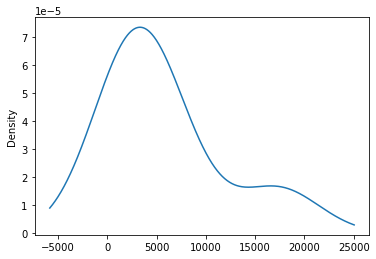

In [217]:
# Using the commonly used limit of 10 to determine which categorical lists should be bucketed, 
# we will bucket only the "CLASSIFICATION" column

# Visualize the value counts
classification_counts = cleandata_df.CLASSIFICATION.value_counts()
print(classification_counts)

classification_counts.plot.density()

The most straightforward method to determine a bucket threshold is to use a density plot to identify where the value counts “fall off” and set the threshold within this region.

From the density plot, visual inspection indicates the fall off is at about 1000 - 2000 instances within the dataset. That will be our bucket limit.

In [218]:
# Identify those category's with values less than the threshold of 1500 will be bucketed
replace_classification = list(classification_counts[classification_counts < 1500].index)

# Replace those classification category items with counts less than the threshold identified above
for classification in replace_classification:
    cleandata_df.CLASSIFICATION = cleandata_df.CLASSIFICATION.replace(classification,"Other")

# Inspect the result of binning to confirm it produced a useful result
# In this case we reduced the number of CLASSIFICATION items from 71 to 6 
cleandata_df.CLASSIFICATION.value_counts()

C1000    17323
C2000     6073
C1200     4837
Other     2261
C3000     1918
C2100     1882
Name: CLASSIFICATION, dtype: int64


### Encode categorical variables using one-hot encoding

We have reduced the number of unique values in the CLASSIFICATION variable, now transpose the text variables using one-hot encoding using Scikit-learn’s OneHotEncoder module. To build the encoded columns, create an instance of OneHotEncoder and “fit” the encoder with our values.


In [219]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(cleandata_df[cleandata_cat]))
encode_df

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(cleandata_cat)
print(encode_df.columns)
print(encode_df.dtypes)
encode_df.head()


Index(['AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       'INCOME_AMT_25000-99999', 'INCOME_AMT_50M+', 'INCOME_AMT_5M-10M'],
      dtype='object')
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other  

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [220]:
# Merge one-hot encoded features into the cleandata_df and drop the original columns
encodedata_df = cleandata_df.merge(encode_df,left_index=True, right_index=True)
encodedata_df = encodedata_df.drop(cleandata_cat,1)
print(encodedata_df.shape)
print(encodedata_df.dtypes)
encodedata_df.head()

(34289, 32)
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64
ORGANIZATION_Corporation        float64
ORGANIZATION_Trust              float64
INCOME_AMT_0                    float64
INCOME_AMT_1-9999           

,ASK_AMT,IS_SUCCESSFUL,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0



### Standardize numerical variables using Scikit-Learn’s StandardScaler class.

Neural network models can interpret and evaluate all forms of numeric data. Even though a neural network can train on raw numerical data, it does not mean that it should train on raw data. There are many reasons why a raw numeric variable is insufficient for use when training a neural network model, such as:

- Raw data often has outliers or extreme values that can artificially inflate a variable’s importance.
- Numerical data can be measured using different units across a dataset—such as time versus temperature, or length versus volume.
- The distribution of a variable can be skewed, leading to misinterpretation of the central tendency.

We will minimize this risk by **standardizing** (also commonly referred to as **normalization**) the numerical data prior to training using Scikit-learn’s StandardScaler module, to standardize numerical data such that a variable is rescaled to a mean of 0 and standard deviation of 1.

We will standardize our numerical variables to reduce the overall likelihood that outliers, variables of different units, or skewed distributions will have a negative impact on the model’s performance.

In [221]:
# Create the StandardScaler instance
scaler = StandardScaler()

### BEFORE scaling prepare the train and test data 

Seperate the TARGET data out of the FEATURES data before scaling

In [222]:
# Assign the TARGET data y
y = encodedata_df.IS_SUCCESSFUL
# Remove "IS_SUCCESSFUL" target data from features data and assign to X
X = encodedata_df.drop(columns=["IS_SUCCESSFUL"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [205]:
# Instantiate StandardScaler to fit the data
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# StandardScaler instance is fitted with the numerical data, transform and standardize the dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(25716, 31)
(8573, 31)


### Neural Network design considerations

Use a TensorFlow neural network design to create a binary classification model that predicts if an Alphabet Soup funded organization will be successful, based on the features in the dataset.

- use a neural network or deep learning model
- Consider the number of inputs before determining the number of neurons and layers in your model

Compile, train, and evaluate the binary classification model, producing the following outputs:

- Final model loss metric
- Final model predictive accuracy
- Attempt to optimize the model training and input data to achieve a target predictive accuracy higher than 75%


### Initial model choice - Deep Learning Neural Net
- Input layer - set the number of input features equal to the number of variables in the feature DataFrame
- Hidden layers - ONE hidden layer with TWICE the number of neurons as the input layer
- Second hidden layer - NOT initially
- all layers use a Keras Dense class
- All of the hidden layers use the relu activation function to identify nonlinear characteristics from the input values.
- Output layer - use the the sigmoid activation function
- The Sigmoid Activation function will help predict the probability that Alphabet Soup funded organization will be successful

### Initial model

In [206]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
# We will start with a ratio of 2 to 1 for the input to hidden layer number of neurons
hidden_nodes_layer1 = len(X_train_scaled[0])*2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# The hidden layer uses ReLU activation function to enable nonlinear relationships
# however the classification output uses a sigmoid activation function to produce a probability output
# The classification model wants a yes or no binary decision; therefore, we only need one output neuron
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
# loss function binary_crossentropy is specifically designed to evaluate a binary classification model
# adam optimizer uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features
# Use evaluation metric of accuracy is used for classification models
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, numpy.array(y_train), epochs=50)

Train on 25716 samples
Epoch 1/50
25716/25716 [==============================] - 2s 66us/sample - loss: 0.6933 - accuracy: 0.5562
Epoch 2/50
25716/25716 [==============================] - 1s 42us/sample - loss: 0.6856 - accuracy: 0.5642
Epoch 3/50
25716/25716 [==============================] - 1s 42us/sample - loss: 0.6840 - accuracy: 0.5679
Epoch 4/50
25716/25716 [==============================] - 1s 44us/sample - loss: 0.6836 - accuracy: 0.5689
Epoch 5/50
25716/25716 [==============================] - 1s 42us/sample - loss: 0.6829 - accuracy: 0.5696
Epoch 6/50
25716/25716 [==============================] - 1s 44us/sample - loss: 0.6828 - accuracy: 0.5703
Epoch 7/50
25716/25716 [==============================] - 1s 45us/sample - loss: 0.6825 - accuracy: 0.5700
Epoch 8/50
25716/25716 [==============================] - 1s 42us/sample - loss: 0.6818 - accuracy: 0.5722
Epoch 9/50
25716/25716 [==============================] - 1s 42us/sample - loss: 0.6818 - accuracy: 0.5700
Epoch 10/50
25

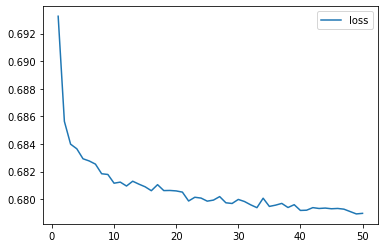

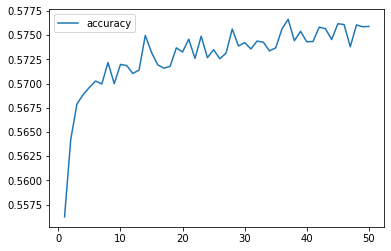

In [207]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
# loss metric - used by machine learning algorithms to score the performance of the model through each iteration 
# and epoch by evaluating the inaccuracy of a single input.
history_df.plot(y="loss")
# Plot the accuracy
# For model predictive accuracy, the higher the number the better, 
history_df.plot(y="accuracy")

### Evaluate the initial model

In [208]:
# Check the model summary
nn.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 62)                1984      
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 63        
Total params: 2,047
Trainable params: 2,047
Non-trainable params: 0
_________________________________________________________________


In [209]:
# Use the test dataset to evaluate this first version of the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, numpy.array(y_test), verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8573/1 - 0s - loss: 0.6851 - accuracy: 0.5628
Loss: 0.6855217874724543, Accuracy: 0.5628134608268738


### Initial model variation conculsion
The target predictive accuracy is **less than 75%** (at 56%), we will try to improve the model.

8573/1 - 0s - loss: 0.6851 - accuracy: 0.5628

Loss: 0.6855217874724543, Accuracy: 0.5628134608268738

### Improvment attempt - increase ratio of neurons in first hidden layer from 2 to 3

In [210]:
# Increase the ratio of number of hidden to input layer neurons
hidden_nodes_layer1 = len(X_train_scaled[0])*3

# The remained of the model remains the sameDefine
number_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, numpy.array(y_train), epochs=50)

# Use the test dataset to evaluate this version of the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, numpy.array(y_test), verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25716 samples
Epoch 1/50
25716/25716 [==============================] - 2s 68us/sample - loss: 0.6918 - accuracy: 0.5535
Epoch 2/50
25716/25716 [==============================] - 1s 45us/sample - loss: 0.6853 - accuracy: 0.5642
Epoch 3/50
25716/25716 [==============================] - 1s 49us/sample - loss: 0.6849 - accuracy: 0.5673
Epoch 4/50
25716/25716 [==============================] - 1s 48us/sample - loss: 0.6832 - accuracy: 0.5678
Epoch 5/50
25716/25716 [==============================] - 1s 45us/sample - loss: 0.6829 - accuracy: 0.5689
Epoch 6/50
25716/25716 [==============================] - 1s 53us/sample - loss: 0.6826 - accuracy: 0.5682
Epoch 7/50
25716/25716 [==============================] - 1s 54us/sample - loss: 0.6826 - accuracy: 0.5708
Epoch 8/50
25716/25716 [==============================] - 1s 54us/sample - loss: 0.6826 - accuracy: 0.5693
Epoch 9/50
25716/25716 [==============================] - 1s 42us/sample - loss: 0.6820 - accuracy: 0.5656
Epoch 10/50
25

### Accuracy is 56%

8573/1 - 0s - loss: 0.6823 - accuracy: 0.5585
        
Loss: 0.6862653077142347, Accuracy: 0.5584976077079773

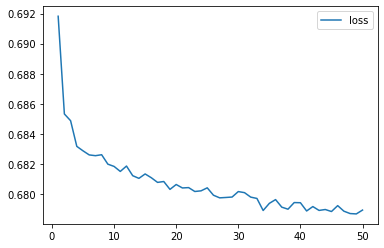

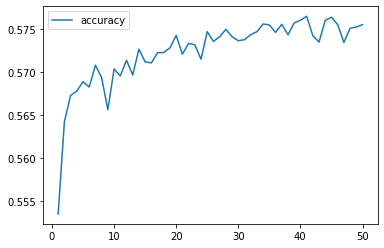

In [211]:
# Update training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

### Increase ratio from 3 to 4 times

In [212]:
# Increase number of neurons to four times number of inputs
hidden_nodes_layer1 = len(X_train_scaled[0])*4

# The remained of the model remains the sameDefine
number_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, numpy.array(y_train), epochs=50)

# Use the test dataset to evaluate this version of the model
model_loss, model_accuracy = nn.evaluate(X_test_scaled, numpy.array(y_test), verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25716 samples
Epoch 1/50
25716/25716 [==============================] - 2s 66us/sample - loss: 0.6897 - accuracy: 0.5618
Epoch 2/50
25716/25716 [==============================] - 1s 44us/sample - loss: 0.6861 - accuracy: 0.5646
Epoch 3/50
25716/25716 [==============================] - 1s 56us/sample - loss: 0.6844 - accuracy: 0.5651
Epoch 4/50
25716/25716 [==============================] - 1s 50us/sample - loss: 0.6844 - accuracy: 0.5653
Epoch 5/50
25716/25716 [==============================] - 1s 48us/sample - loss: 0.6836 - accuracy: 0.5674
Epoch 6/50
25716/25716 [==============================] - 2s 69us/sample - loss: 0.6834 - accuracy: 0.5661
Epoch 7/50
25716/25716 [==============================] - 2s 60us/sample - loss: 0.6823 - accuracy: 0.5708
Epoch 8/50
25716/25716 [==============================] - 1s 47us/sample - loss: 0.6828 - accuracy: 0.5694
Epoch 9/50
25716/25716 [==============================] - 1s 58us/sample - loss: 0.6826 - accuracy: 0.5703
Epoch 10/50
25

### Accuracy is 56%

8573/1 - 0s - loss: 0.6881 - accuracy: 0.5580
        
Loss: 0.6862750355635309, Accuracy: 0.5580310225486755

### Improvment attempt 2 - Add second hidden layer

In [213]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = len(X_train_scaled[0])*3
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Adding a second hidden layer, ration of one for number of neurons to input layer number of neurons 
hidden_nodes_layer2 = len(X_train_scaled[0])
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, numpy.array(y_train), epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,numpy.array(y_test),verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25716 samples
Epoch 1/50
25716/25716 [==============================] - 2s 71us/sample - loss: 0.6884 - accuracy: 0.5583
Epoch 2/50
25716/25716 [==============================] - 1s 47us/sample - loss: 0.6839 - accuracy: 0.5670
Epoch 3/50
25716/25716 [==============================] - 1s 47us/sample - loss: 0.6830 - accuracy: 0.5695
Epoch 4/50
25716/25716 [==============================] - 1s 49us/sample - loss: 0.6820 - accuracy: 0.5713
Epoch 5/50
25716/25716 [==============================] - 1s 48us/sample - loss: 0.6820 - accuracy: 0.5696
Epoch 6/50
25716/25716 [==============================] - 1s 50us/sample - loss: 0.6814 - accuracy: 0.5703
Epoch 7/50
25716/25716 [==============================] - 1s 48us/sample - loss: 0.6809 - accuracy: 0.5729
Epoch 8/50
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6810 - accuracy: 0.5741
Epoch 9/50
25716/25716 [==============================] - 1s 57us/sample - loss: 0.6806 - accuracy: 0.5762
Epoch 10/50
25

### Accuracy 56%

8573/1 - 0s - loss: 0.6883 - accuracy: 0.5618
        
Loss: 0.6913094726504877, Accuracy: 0.5617637038230896

### Improvment attempt 3 - Double the number of epochs


In [227]:
number_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
hidden_nodes_layer1 = len(X_train_scaled[0])*4
hidden_nodes_layer2 = len(X_train_scaled[0])
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Double the number of epochs
fit_model = nn.fit(X_train_scaled, numpy.array(y_train), epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, numpy.array(y_test),verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25716 samples
Epoch 1/100
25716/25716 [==============================] - 2s 71us/sample - loss: 0.6899 - accuracy: 0.5554
Epoch 2/100
25716/25716 [==============================] - 1s 48us/sample - loss: 0.6857 - accuracy: 0.5633
Epoch 3/100
25716/25716 [==============================] - 1s 47us/sample - loss: 0.6834 - accuracy: 0.5695
Epoch 4/100
25716/25716 [==============================] - 1s 48us/sample - loss: 0.6824 - accuracy: 0.5714
Epoch 5/100
25716/25716 [==============================] - 1s 49us/sample - loss: 0.6817 - accuracy: 0.5710
Epoch 6/100
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6816 - accuracy: 0.5729
Epoch 7/100
25716/25716 [==============================] - 1s 47us/sample - loss: 0.6812 - accuracy: 0.5725
Epoch 8/100
25716/25716 [==============================] - 1s 50us/sample - loss: 0.6810 - accuracy: 0.5719
Epoch 9/100
25716/25716 [==============================] - 1s 55us/sample - loss: 0.6806 - accuracy: 0.5731
Epoch

25716/25716 [==============================] - 1s 51us/sample - loss: 0.6732 - accuracy: 0.5828
Epoch 77/100
25716/25716 [==============================] - 1s 57us/sample - loss: 0.6732 - accuracy: 0.5815
Epoch 78/100
25716/25716 [==============================] - 1s 53us/sample - loss: 0.6733 - accuracy: 0.5823
Epoch 79/100
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6733 - accuracy: 0.5820
Epoch 80/100
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6733 - accuracy: 0.5828
Epoch 81/100
25716/25716 [==============================] - 1s 56us/sample - loss: 0.6729 - accuracy: 0.5827
Epoch 82/100
25716/25716 [==============================] - 1s 55us/sample - loss: 0.6733 - accuracy: 0.5826
Epoch 83/100
25716/25716 [==============================] - 1s 53us/sample - loss: 0.6727 - accuracy: 0.5829
Epoch 84/100
25716/25716 [==============================] - 2s 69us/sample - loss: 0.6728 - accuracy: 0.5826
Epoch 85/100
25716/25716 [======

### Accuracy still 56%

8573/1 - 0s - loss: 0.6926 - accuracy: 0.5612

Loss: 0.6982309062242035, Accuracy: 0.5611804723739624

### Improvment attempt 3 - Double again the number of epochs

In [225]:
number_input_features = len(X_train_scaled[0])
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
hidden_nodes_layer1 = len(X_train_scaled[0])*4
hidden_nodes_layer2 = len(X_train_scaled[0])
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# DOUBLE AGAIN the number of epochs
fit_model = nn.fit(X_train_scaled, numpy.array(y_train), epochs=200)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, numpy.array(y_test),verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25716 samples
Epoch 1/200
25716/25716 [==============================] - 2s 77us/sample - loss: 0.6899 - accuracy: 0.5562
Epoch 2/200
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6850 - accuracy: 0.5677
Epoch 3/200
25716/25716 [==============================] - 1s 49us/sample - loss: 0.6831 - accuracy: 0.5681
Epoch 4/200
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6823 - accuracy: 0.5690
Epoch 5/200
25716/25716 [==============================] - 1s 50us/sample - loss: 0.6814 - accuracy: 0.5716
Epoch 6/200
25716/25716 [==============================] - 1s 52us/sample - loss: 0.6815 - accuracy: 0.5709
Epoch 7/200
25716/25716 [==============================] - 1s 53us/sample - loss: 0.6813 - accuracy: 0.5724
Epoch 8/200
25716/25716 [==============================] - 1s 52us/sample - loss: 0.6811 - accuracy: 0.5724
Epoch 9/200
25716/25716 [==============================] - 1s 52us/sample - loss: 0.6807 - accuracy: 0.5732
Epoch

25716/25716 [==============================] - 1s 51us/sample - loss: 0.6731 - accuracy: 0.5826
Epoch 77/200
25716/25716 [==============================] - 2s 63us/sample - loss: 0.6725 - accuracy: 0.5829
Epoch 78/200
25716/25716 [==============================] - 1s 57us/sample - loss: 0.6729 - accuracy: 0.5829
Epoch 79/200
25716/25716 [==============================] - 2s 63us/sample - loss: 0.6726 - accuracy: 0.5824
Epoch 80/200
25716/25716 [==============================] - 1s 54us/sample - loss: 0.6729 - accuracy: 0.5826
Epoch 81/200
25716/25716 [==============================] - 2s 60us/sample - loss: 0.6725 - accuracy: 0.5833
Epoch 82/200
25716/25716 [==============================] - 1s 52us/sample - loss: 0.6726 - accuracy: 0.5826
Epoch 83/200
25716/25716 [==============================] - 1s 52us/sample - loss: 0.6728 - accuracy: 0.5826
Epoch 84/200
25716/25716 [==============================] - 2s 61us/sample - loss: 0.6730 - accuracy: 0.5827
Epoch 85/200
25716/25716 [======

25716/25716 [==============================] - 1s 52us/sample - loss: 0.6704 - accuracy: 0.5841
Epoch 151/200
25716/25716 [==============================] - 1s 49us/sample - loss: 0.6705 - accuracy: 0.5838
Epoch 152/200
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6707 - accuracy: 0.5838
Epoch 153/200
25716/25716 [==============================] - 1s 50us/sample - loss: 0.6707 - accuracy: 0.5837
Epoch 154/200
25716/25716 [==============================] - 1s 55us/sample - loss: 0.6728 - accuracy: 0.5840
Epoch 155/200
25716/25716 [==============================] - 1s 49us/sample - loss: 0.6700 - accuracy: 0.5838
Epoch 156/200
25716/25716 [==============================] - 1s 51us/sample - loss: 0.6701 - accuracy: 0.5840
Epoch 157/200
25716/25716 [==============================] - 1s 50us/sample - loss: 0.6704 - accuracy: 0.5836
Epoch 158/200
25716/25716 [==============================] - 2s 68us/sample - loss: 0.6703 - accuracy: 0.5844
Epoch 159/200
25716/2571

### Accuracy is NOT going in the right direction, 56%!! :/

8573/1 - 0s - loss: 0.7088 - accuracy: 0.5598

Loss: 0.7132977329835054, Accuracy: 0.5597807168960571